# Privacy Preserving Machine Learning

Course taught by Aurélien Bellet

Course page: http://researchers.lille.inria.fr/abellet/teaching/private_machine_learning_course.html

# Practical session 1: Differential privacy for numeric queries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml # need sklearn >= 0.22

Below we provide a helper function to draw bar plots from pandas Series.

In [2]:
def bar_plot_pandas(series1, series2=None, label1="Series 1", label2="Series 2", title=""):
    '''
    Draws a bar plot of one Pandas Series, or two pandas Series with the same index
    
    Parameters
    ----------
    series1 : Series of float
        First input
    series2 : Series of float, optional
        Second input (with same index)
    label1 : string, optional
        Label for the first series
    label2 : string, optional
        Label for the second series
    title : string, optional
        Plot title
    '''
    if series2 is None:
        series1.plot.bar()
        plt.legend([label1])
    else:
        concat_series = pd.DataFrame({label1: series1, label2: series2}).reset_index()
        concat_series.plot.bar(x="index", y=[label1, label2], xlabel="", title=title)

## Dataset

We will be working with a dataset from the US Census (also known as the Adult dataset). You can read about the dataset [here](https://archive.ics.uci.edu/ml/datasets/census+income).

The following line loads the dataset from [OpenML](https://www.openml.org/) with the `fetch_openml` method of `sklearn`. The option `as_frame=True` (**requires sklearn version >= 0.22**) loads the dataset in `pandas DataFrame` format: this keeps the attributes in their original form and will be more convenient to work with. If you prefer working with a numpy array (not recommended), set `as_frame=False`.

In [3]:
dataset_handle = fetch_openml(name='adult', version=2, as_frame=True)
dataset = dataset_handle.frame

Take a look at the dataset, in particular the number of rows (individuals), the number of columns (attributes) and what they represent.

In [4]:
n, d = dataset.shape
print(n, d)
dataset.head(10)

48842 15


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
6,29.0,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
7,63.0,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K
8,24.0,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9,55.0,Private,104996.0,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K


## Question 1 (non-private queries)

Implement a function for each of these types of queries (without privacy) and test them on the dataset:
- **Simple count queries**: it takes as input a dataset (`DataFrame`), a categorical attribute (e.g., `"sex"`) and a value (e.g., `"Male"`), and returns how many rows in the dataset have the prescribed attribute value.
- **Averaging queries**: it takes as input a dataset and a numeric attribute (e.g., `"age"`), and returns the average value of this attribute in the dataset.
- **Histogram queries**: it takes as input a dataset and a categorical attribute (e.g., `"sex"`), and returns the histogram of counts for this attribute in the dataset (i.e., for each possible value of the attribute, how many rows have this value).

Reminder: for a DataFrame `df`, we can access the column corresponding to an attribute `attr` by `df[attr]`. The method `value_counts()` allows to build a histogram of a column. To plot a pandas Series `s` as a histogram, you can use `s.plot.bar()`.

Note: You can use the function `bar_plot_pandas` provided in the preamble to draw a bar plot of a pandas Series, which is useful to show histograms.

In [5]:
def count_query(df, attribute, value):
    '''
    Parameters
    ----------
    df : DataFrame
        Dataset
    attribute : string
        Name of an attribute with categorical values
    value : string or int
        Value of attribute to count
        
    Returns
    -------
    count : int
        The number of records with `attribute=value` in dataset `df`
    '''
    
    # TO COMPLETE
    pass # this is just to avoid error while the function is empty

In [6]:
def average_query(df, attribute):
    '''
    Parameters
    ----------
    df : DataFrame
        Dataset
    attribute : string
        Name of an attribute with numeric values
        
    Returns
    -------
    average : float
        The average value of `attribute` in dataset `df`
    '''
        
    # TO COMPLETE
    pass

In [7]:
def histogram_query(df, attribute):
    '''
    Parameters
    ----------
    df : DataFrame
        Dataset
    attribute : string
        Name of an attribute with categorical values
        
    Returns
    -------
    histogram : array or Series of int
        The histogram of `attribute`, i.e., the number of times each value of `attribute` appears in `df`
    '''
    # TO COMPLETE
    pass

## Question 2 (Laplace mechanism)

Implement the Laplace mechanism, i.e., a function which takes as input a (non-private) query output, the query's $\ell_1$ sensitivity, the desired value of $\epsilon$ and a random seed (for reproducibility), and returns a $\epsilon$-differentially private estimate of the query. To draw Laplace noise, check `np.random.laplace`. The function should work with queries that output a scalar (like simple count and averaging queries), as well as those that output a vector (like histogram queries).

In [8]:
def laplace_mechanism(q, s1, eps, random_state=None):
    '''
    Parameters
    ----------
    q : float or array/Series of float
        The non-private output of the query
    s1 : float
        The L1 sensitivity of the query
    eps : float
        Parameter epsilon of differential privacy
    random_state : int, optional (default=None)
        Random seed
        
    Returns
    -------
    private_q : float or array/Series of float
        An eps-DP evaluation of the query
    '''

    rng = np.random.RandomState(random_state)
    
    # TO COMPLETE
    if hasattr(q, 'shape'): # query output is multi-dimensional
        pass
    else: # query output is a scalar
        pass


## Question 3 (Laplace mechanism on count queries)

We would like to use the Laplace mechanism to:
- privately count the number of males in the dataset
- generate a private histogram of the `"workclass"` attribute

What is the sensitivity of the query in each case?

Run the Laplace mechanism with different values of $\epsilon$ and compute the $\ell_1$-error with respect to the true (non-private) output to see the effect on the utility and compare with the formal error bound seen in the lecture. Recall that the mechanism is random, so unless you fix the seed you will get a different result at each execution. Visually compare the private and non-private histograms using the function `bar_plot_pandas` provided at the beginning of the notebook.

Note: you may round the outputs of the private mechanism to make them integers if you like. This can be considered as post-processing and thus preserves DP (see Bonus Question 5 to go further on this aspect).

In [9]:
def l1_error(a, b):
    '''
    Parameters
    ----------
    a : float or array/Series of float
        First input
    b : float or array/Series of float
        Second input
        
    Returns
    -------
    l1_error : float
        The L1 distance between `a` and `b`: ||a-b||_1
    '''

    # TO COMPLETE
    pass

# list of (query,sensitivity) tuples to loop over
# queries = 

# for eps in [0.1, 1.]:
#     for q, s in queries:


## Question 4 (contingency tables and the "paradox" of parallel composition)

We can go beyond histograms and build contingency tables across two (or even more) variables. Implement a function for such queries using `crosstab` from pandas, and use the Laplace mechanism to privately find out how people in the dataset break down according to the combination of `'gender'` and `'marital-status'`. You may need to adapt your implementation of Laplace to work with k-way tables (e.g., by using the method `applymap` together with a function that adds 1D Laplace noise).

Pushing this reasoning further, it may seem that there is a paradox because parallel composition gets us more information "for free" (e.g., we can build a k-way table over a large number of attributes that could ultimately reveal very precise information about individuals in the dataset, without increasing the privacy loss). This contradicts the principle that asking more things should cost something. Explain why there is in fact no paradox and what is the cost that one pays in this case (if needed, you can see what happens when privately releasing contingency tables across many columns).

In [10]:
def table_query(df, row_attr_list, col_attr_list):
    '''
    Parameters
    ----------
    df : DataFrame
        Dataset
    row_attr_list : list
        List of attributes
    col_attr_list : list
        List of attributes
        
    Returns
    -------
    cross_table : DataFrame
        Cross tabulation (contingency table) of `df` according to `row_attr_list` and `col_attr_list`
    '''

    # TO COMPLETE
    pass

## Question 5 (Laplace mechanism on average queries)

We would like to use the Laplace mechanism to privately estimate the average age of people in the dataset. We assume that the number of people in the dataset is public.

1. Propose and implement simple practical strategies to compute or estimate the sensitivity of this query in the following two scenarios, and discuss the merits and/or drawbacks of your proposals:
  - You are the trusted curator: you have access to the raw dataset and would like to release an estimate of the average age of people in the dataset with differential privacy guarantees.
  - You are an external data analyst: you do not have access to the raw dataset but only to an API to send queries. You have to convince the trusted curator that the proposed sensitivity is safe.
2. Suggest some ideas regarding how we could change a bit the query to get a simple and safe bound on sensitivity, at the expense of possibly introducing some bias in the output. Implement the proposed solution. Hint: the method `clip` from pandas might be useful here.

## Question 6 (average over a subset)

We would now like to compute the average age of divorced people. How can we use the Laplace mechanism to privately answer this query? Implement your solution.

## Question 7 (Gaussian mechanism and comparison with Laplace)

Implement the Gaussian mechanism (to draw Gaussian noise, check `np.random.normal`). Make an experimental comparison with the Laplace mechanism by plotting the privacy-utility trade-off for a 1D query of your choice. For the Gaussian mechanism, study the influence of $\delta$.

In [11]:
def gaussian_mechanism(q, s2, eps, delta, random_state=None):
    '''
    Parameters
    ----------
    q : float or array/Series of float
        The non-private output of the query
    s2 : float
        The L2 sensitivity of the query
    eps : float
        Parameter epsilon of differential privacy
    delta : float
        Parameter delta of differential privacy
    random_state : int, optional (default=None)
        Random seed
        
    Returns
    -------
    private_q : float or array/Series of float
        An (eps,delta)-DP evaluation of the query
    '''
    
    rng = np.random.RandomState(random_state)
    
    # TO COMPLETE
    if hasattr(q, 'shape'): # query output is multi-dimensional
        pass
    else: # query output is a scalar
        pass

<ipython-input-12-0b50177a14b6>:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


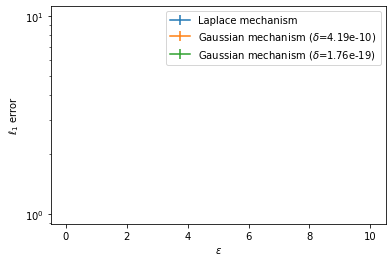

In [12]:
# q = 
# s = 
eps_list = np.linspace(0.01, 10.0, num=20)
delta1 = 1. / n**2
delta2 = 1. / n**4
n_runs = 50

error = np.zeros((len(eps_list), 3, n_runs))

for i, eps in enumerate(eps_list):
    for r in range(n_runs):
        # error[i, 0, r] = 
        # error[i, 1, r] = 
        # error[i, 2, r] = 
        pass
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(eps_list, error[:, 0, :].mean(axis=1), error[:, 0, :].std(axis=1), label='Laplace mechanism')
ax.errorbar(eps_list, error[:, 1, :].mean(axis=1), error[:, 1, :].std(axis=1),
            label='Gaussian mechanism ($\delta$=' + "{:.2e}".format(delta1) + ')')
ax.errorbar(eps_list, error[:, 2, :].mean(axis=1), error[:, 2, :].std(axis=1),
            label='Gaussian mechanism ($\delta$=' + "{:.2e}".format(delta2) + ')')
plt.xlabel("$\epsilon$")
plt.ylabel("$\ell_1$ error")
ax.set_yscale('log')
ax.legend()

## Bonus Question 1 (Vulnerabilities from subtle implementation details)

The implementation of private mechanisms in this practical are meant to illustrate the main concepts seen in the lecture and the practical privacy-utility trade-offs that are achievable in practice. When deploying differential privacy in real-world production systems, utmost care must be taken to ensure that there is no unintended leakage of information that an adversary could exploit.

For instance, your implementation of private histogram queries is likely to suffer from subtle privacy leakages which can actually break the differential privacy guarantees! Can you identify some of them and suggest a way to fix them?

Hints:
- one potential problem is related to the order in which the values of the private histogram are given
- another one is related to the choice of attribute values reported in the histograms

## Bonus Question 2 (Linear queries)

For any dataset $D\in\mathbb{N}^d$ (i.e., seen as a histogram over the data domain $\mathcal{X}$ of size $d$), a linear query $f_A:\mathbb{N}^{|d|}\rightarrow\mathbb{R}^k$ parameterized by a (public) matrix $A\in\mathbb{R}^{k\times d}$ is defined by:

$$f_A(D) = AD = \begin{bmatrix}
           \sum_{j=1}^d A_{1,j}D_j \\
           \vdots \\
           \sum_{j=1}^d A_{k,j}D_j
         \end{bmatrix} \in\mathbb{R}^k$$

Linear queries are a generalization of some queries we have discussed earlier (such as count queries, sum queries and histogram queries), allowing to use arbitrary weights on the elements of the data domain $\mathcal{X}$.

We would like to apply the Gaussian mechanism to privately compute $f_A(D)$ for some $A\in\mathbb{R}^{k\times d}$. What is the $\ell_2$ sensitivity of $f_A$? Show that this general formula allows to recover the sensitivity obtained for count, sum and histogram queries.

## Bonus Question 3 (Error due to privacy vs. error due to sampling)

In many applications, including statistics and machine learning, the observed data is seen as an i.i.d. sample from an unknown distribution and the goal is to use it to estimate a quantity about the distribution. Therefore, even in the non-private case, there is some *error due to sampling* because we only observe a finite number of examples.

Think about the task of estimating the mean of a distribution. The error due to sampling is typically of order $1/\sqrt{n}$. How does this compare to the error due to privacy? Evaluate this empirically. You may use synthetic data drawn from a known distribution, or see the dataset used so far as the ground truth and work with a random subset.

## Bonus Question 4 (Improved utility for the Gaussian mechanism)

As we discussed in class, the classic result to calibrate the noise needed for the Gaussian mechanism uses a tail bound (i.e., an upper bound for the true $\delta$) and further approximations to obtain a simple closed-form expression for $\sigma$, see Appendix A of [Dwork & Roth (2014)](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf).

In practice, we can obtain slightly better utility by using the tail bound exactly and numerically search for the value of $\sigma$ that is sufficient to match the required inequality. Implement this approach and compare the $\sigma$ you obtain to the one given by the classic result.

It turns out we can even go further and optimally calibrate the noise using the Gaussian cumulative density function instead of a tail bound. This is what is done in [Balle & Wang (2018)](http://proceedings.mlr.press/v80/balle18a/balle18a.pdf). They provide some simple [Python implementation](https://github.com/BorjaBalle/analytic-gaussian-mechanism). Use it to compare this approach to the previous ones.

## Bonus Question 5 (Integer queries and the Truncated Geometric mechanism)

Some queries output integers, sometimes in a bounded range. For instance, a count query over a dataset of size $n$ outputs an integer in $[0..n]$. If we use the Laplace or Gaussian mechanisms, the output becomes a floating point number. However, as briefly mentioned at the end of the second lecture, we can round these numbers (for instance to the nearest integer) and even truncate them to $[0..n]$ if they exceed $n$ or are smaller than $0$. Assuming that the size $n$ of the private dataset is public, this does not violate differential privacy because it can be seen as post-processing (it does not depend on the private dataset).

Alternatively, we can use a mechanism which directly operates in the integer domain. An example is the (truncated) Geometric mechanism introduced by [Ghosh et al. (2012)](https://theory.stanford.edu/~tim/papers/priv.pdf), which relies on the two-sided Geometric distribution $P(y)=\frac{1-\alpha}{1+\alpha}\alpha^{|y|}$ with parameter $\alpha\in(0,1)$.

Using the following implementation of the two-sided Geometric distribution, implement the Geometric mechanism and the truncated Geometric mechanism.

In [13]:
def geometric2(alpha):
    # The two-sided geometric distribution is equivalent to the difference
    # between two iid geometric distributions.
    # Reference (page 179):
    # https://pdfs.semanticscholar.org/61b3/b99f466815808fd0d03f5d2791eea8b541a1.pdf
    x = np.random.geometric(alpha)
    y = np.random.geometric(alpha)
    return x - y